In [1]:
import pandas as pd
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

**Load the dataset**

In [2]:
df1 = pd.read_csv('heart_2020_cleaned.csv')

print(df1.head());
# Get the size of the DataFrame
size = df1.shape

# Print the number of rows and columns
print("Number of rows:", size[0])
print("Number of columns:", size[1])
df1.columns


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

**Data Preprocessing**

In [3]:
# Check for NaN values in the dataset
nan_values = df1.isnull().sum()
print("NaN values in the dataset:")
print(nan_values)


# Handling missing values
df1.dropna(inplace=True)  # Drop rows with any missing values

NaN values in the dataset:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


categorical to numeric conversion

In [4]:
# Assuming you've already loaded the DataFrame df from the CSV file

# Convert 'AgeCategory' to numeric for easier filtering
df1['AgeCategory'] = df1['AgeCategory'].replace({
    '18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5,
    '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '65-69': 10,
    '70-74': 11, '75-79': 12, '80 or older': 13
})

# Filter the data for ages below 60
df = df1[df1['AgeCategory'] < 9]  # AgeCategory below 8 corresponds to below 60 years old

# Display the filtered DataFrame
print(df)


       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
4                No  23.71      No              No     No            28.0   
11               No  28.71     Yes              No     No             0.0   
15               No  29.18      No              No     No             1.0   
22               No  26.17     Yes              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
319787           No  36.54      No              No     No             7.0   
319789           No  22.22      No              No     No             0.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \

In [5]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

#transforming all numeric values to 1 and 0 form.
print(df.head());
df.columns



    HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0              0  16.60        1                0       0             3.0   
4              0  23.71        0                0       0            28.0   
11             0  28.71        1                0       0             0.0   
15             0  29.18        0                0       0             1.0   
22             0  26.17        1                0       0             0.0   

    MentalHealth  DiffWalking  Sex  AgeCategory   Race  Diabetic  \
0           30.0            0    0            8  White         1   
4            0.0            1    0            5  White         0   
11           0.0            0    0            8  White         0   
15           0.0            0    0            7  White         0   
22          15.0            0    0            6  White         0   

    PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                  1  Very good        5.0      

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming df is your DataFrame containing both training and test data

# Define the column transformer
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['AgeCategory', 'Race', 'GenHealth']),
    remainder='passthrough')

# Fit and transform the data
transformed_data = transformer.fit_transform(df)

# Get column names for the transformed features
transformed_feature_names = list(transformer.named_transformers_['onehotencoder'].get_feature_names_out(['AgeCategory', 'Race', 'GenHealth']))
new_column_names = transformed_feature_names + list(df.columns.drop(['AgeCategory', 'Race', 'GenHealth']))

# Create a DataFrame with transformed features and original features
transformed_df = pd.DataFrame(transformed_data, columns=new_column_names)

# Concatenate the two tables along columns axis
df = pd.concat([transformed_df, df], axis=1)

# Remove old columns
df.drop(['AgeCategory', 'Race', 'GenHealth'], axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
# Remove duplicate columns from the head of the DataFrame
df = df.loc[:, ~df.columns.duplicated()]

# Display the DataFrame after removing duplicate columns
print(df.head())
df.columns


   AgeCategory_1  AgeCategory_2  AgeCategory_3  AgeCategory_4  AgeCategory_5  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            1.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   AgeCategory_6  AgeCategory_7  AgeCategory_8  \
0            0.0            0.0            1.0   
1            0.0            0.0            0.0   
2            0.0            0.0            1.0   
3            0.0            1.0            0.0   
4            1.0            0.0            0.0   

   Race_American Indian/Alaskan Native  Race_Asian  ...  PhysicalHealth  \
0                                  0.0         0.0  ...             3.0   
1                                  0.0         0.0  ...            2

Index(['AgeCategory_1', 'AgeCategory_2', 'AgeCategory_3', 'AgeCategory_4',
       'AgeCategory_5', 'AgeCategory_6', 'AgeCategory_7', 'AgeCategory_8',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'HeartDisease', 'BMI', 'Smoking',
       'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth',
       'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [9]:
# After encoding
print(df.head());
df.columns
# Get the size of the DataFrame
size = df.shape

# Print the number of rows and columns
print("Number of rows:", size[0])
print("Number of columns:", size[1])
df.columns

   AgeCategory_1  AgeCategory_2  AgeCategory_3  AgeCategory_4  AgeCategory_5  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            1.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   AgeCategory_6  AgeCategory_7  AgeCategory_8  \
0            0.0            0.0            1.0   
1            0.0            0.0            0.0   
2            0.0            0.0            1.0   
3            0.0            1.0            0.0   
4            1.0            0.0            0.0   

   Race_American Indian/Alaskan Native  Race_Asian  ...  PhysicalHealth  \
0                                  0.0         0.0  ...             3.0   
1                                  0.0         0.0  ...            2

Index(['AgeCategory_1', 'AgeCategory_2', 'AgeCategory_3', 'AgeCategory_4',
       'AgeCategory_5', 'AgeCategory_6', 'AgeCategory_7', 'AgeCategory_8',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'HeartDisease', 'BMI', 'Smoking',
       'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth',
       'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [10]:
df.dropna( inplace=True)

In [11]:
# Flatten the DataFrame
df_flattened = df.values.reshape(-1, df.shape[1])

# Convert back to DataFrame if necessary
df_flattened = pd.DataFrame(df_flattened, columns=df.columns)

In [12]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming 'HeartDisease' is your target variable
target = 'HeartDisease'
features = df_flattened.drop(columns=[target])

# Extract features and target
X = features.values
y = df_flattened[target].values

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Concatenate balanced features and target
balanced_data = np.hstack((X_smote, y_smote.reshape(-1, 1)))

# Convert to DataFrame
column_names = list(features.columns) + [target]
balanced_df = pd.DataFrame(balanced_data, columns=column_names)

print(balanced_df)

        AgeCategory_1  AgeCategory_2  AgeCategory_3  AgeCategory_4  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
339311            0.0            0.0            0.0            0.0   
339312            0.0            0.0            0.0            0.0   
339313            0.0            0.0            0.0            0.0   
339314            0.0            0.0            0.0            0.0   
339315            0.0            0.0            0.0            0.0   

        AgeCategory_5  AgeCategory_6  AgeCategory_7  AgeCategory_8  \
0            0.000000       0.000000       0.000000       1.000000   
1            1.0000

**Feature Selection**

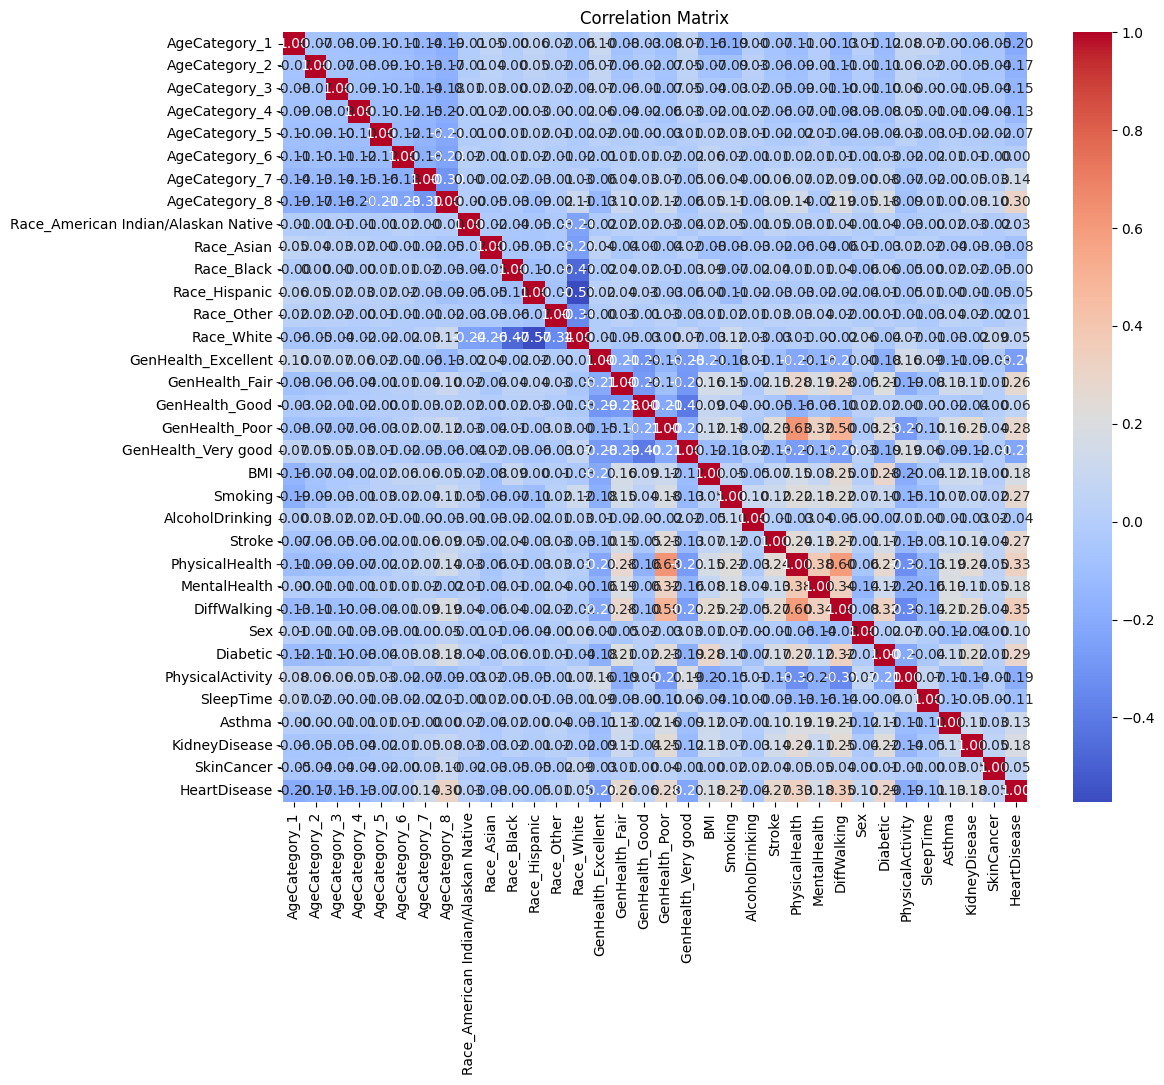

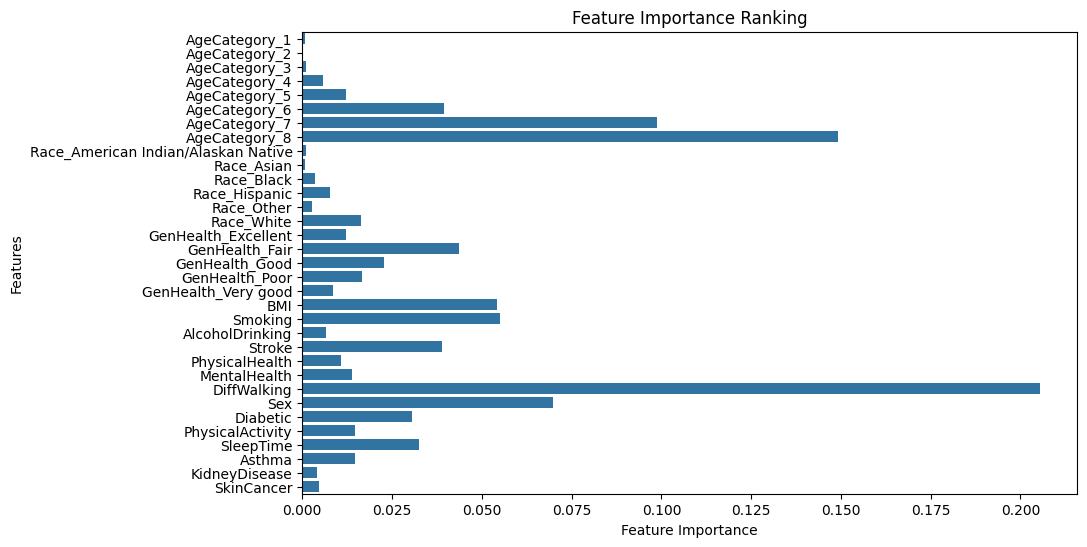

In [13]:
# Correlation Analysis
correlation_matrix = balanced_df.corr()
plt.figure(figsize=(12, 10))  # Increase the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})  # Increase the font size of annotations
plt.title('Correlation Matrix')
plt.show()


# Feature Importance with Decision Tree Classifier
X = balanced_df.drop(columns=['HeartDisease'])  # Features
y = balanced_df['HeartDisease']  # Target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Decision Tree Classifier
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Feature Importance
feature_importance = clf.feature_importances_
features = X.columns

# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.show()


By considering result of removing SkinCancer,Kidney Disease and result of remvoing Physical health and Mental Health.We have decided to remove features which has less impact on heart attack prediction . Those features are PhysicalHealth and MentalHealth.

In [14]:

# # Drop 'PhysicalHealth' and 'MentalHealth' columns from the balanced DataFrame
balanced_df.drop(columns=['PhysicalHealth', 'MentalHealth'], inplace=True)

print(balanced_df)

balanced_df.drop(columns=[], inplace=True)



        AgeCategory_1  AgeCategory_2  AgeCategory_3  AgeCategory_4  \
0                 0.0            0.0            0.0            0.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
...               ...            ...            ...            ...   
339311            0.0            0.0            0.0            0.0   
339312            0.0            0.0            0.0            0.0   
339313            0.0            0.0            0.0            0.0   
339314            0.0            0.0            0.0            0.0   
339315            0.0            0.0            0.0            0.0   

        AgeCategory_5  AgeCategory_6  AgeCategory_7  AgeCategory_8  \
0            0.000000       0.000000       0.000000       1.000000   
1            1.0000

**Splitting The Dataset**

In [15]:
#Select Features
# df = ndf
features = balanced_df.drop(columns =['HeartDisease'], axis = 1)

#Select Target
target = balanced_df['HeartDisease']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (271452, 31)
Shape of testing feature: (67864, 31)
Shape of training label: (271452,)
Shape of training label: (67864,)


In [16]:
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

X_train.columns
X_test.columns


Index(['AgeCategory_1', 'AgeCategory_2', 'AgeCategory_3', 'AgeCategory_4',
       'AgeCategory_5', 'AgeCategory_6', 'AgeCategory_7', 'AgeCategory_8',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

**Training and Testing the model using various ML algorithms**

**1.Supervised ML Algorithms**

1.  KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale test data (note: use transform instead of fit_transform)
X_test_scaled = scaler.transform(X_test)

# Define and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9493987975951904


Confusion Matrix

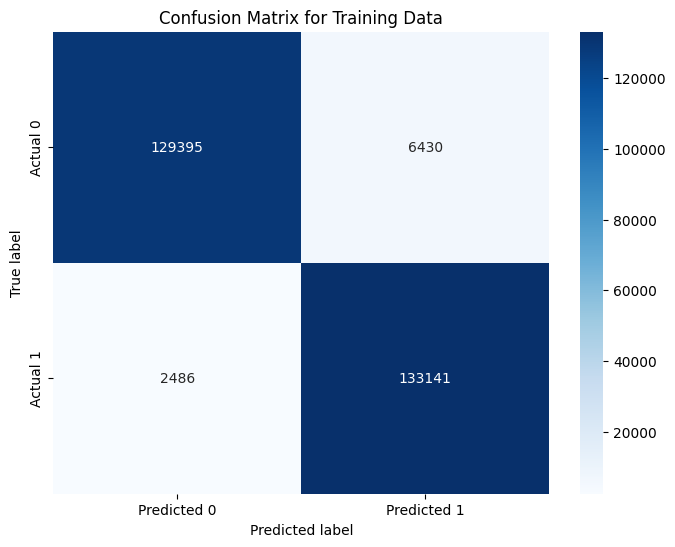

Training Data Metrics:
Accuracy: 0.9671544140400513
Precision: 0.9539302577182939
Recall: 0.9816703163824312
F1-score: 0.9676015087318948


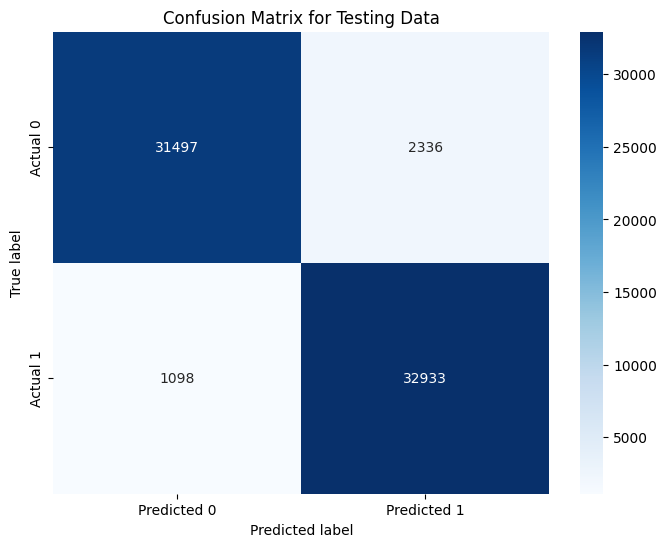

Testing Data Metrics:
Accuracy: 0.9493987975951904
Precision: 0.9337661969434915
Recall: 0.9677353001674943
F1-score: 0.9504473304473305


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions on training data
y_train_pred = knn.predict(X_train_scaled)

# Confusion matrix for training data
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculate accuracy, precision, recall, and F1-score for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_score_train = f1_score(y_train, y_train_pred)

print("Training Data Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_score_train)

# Predictions on testing data
y_test_pred = knn.predict(X_test_scaled)

# Confusion matrix for testing data
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculate accuracy, precision, recall, and F1-score for testing data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_score_test = f1_score(y_test, y_test_pred)

print("Testing Data Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)


2.  Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# n_estimators is the number of trees in the forest, you can adjust it as needed
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.9770275845809265


Confusion Matrix

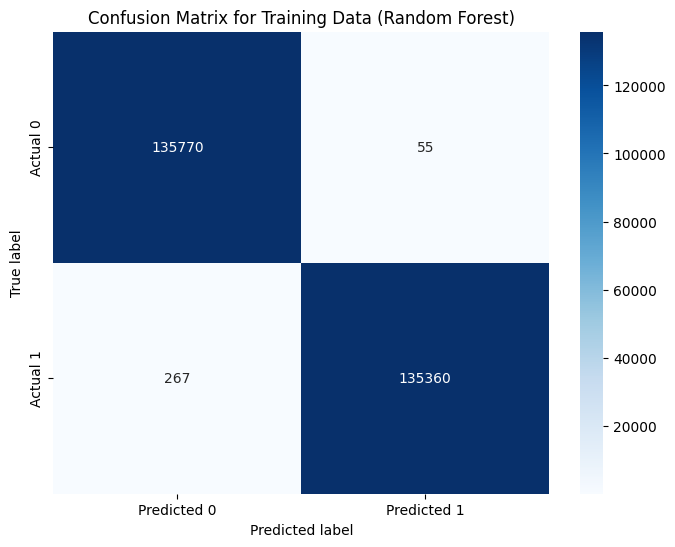

Training Data Metrics (Random Forest):
Accuracy: 0.9988137865994725
Precision: 0.9995938411549681
Recall: 0.9980313654360857
F1-score: 0.9988119922373654


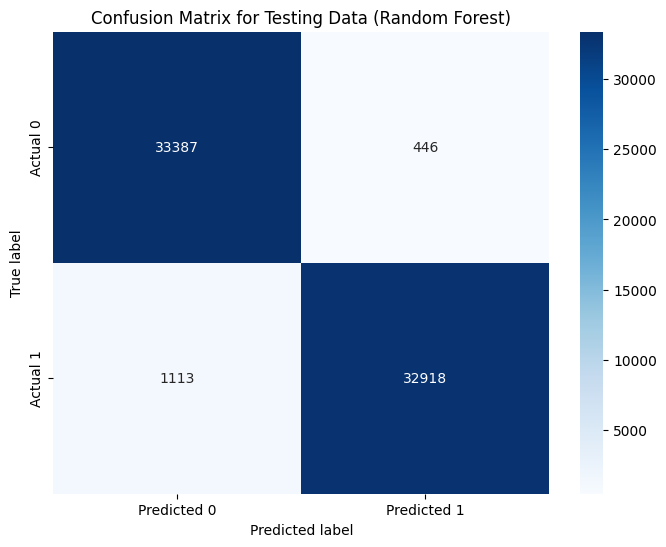

Testing Data Metrics (Random Forest):
Accuracy: 0.9770275845809265
Precision: 0.9866322982855773
Recall: 0.9672945255796186
F1-score: 0.9768677201572817


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on training data
y_train_pred_rf = rf_classifier.predict(X_train)

# Confusion matrix for training data
confusion_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Training Data (Random Forest)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculate accuracy, precision, recall, and F1-score for training data
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
precision_train_rf = precision_score(y_train, y_train_pred_rf)
recall_train_rf = recall_score(y_train, y_train_pred_rf)
f1_score_train_rf = f1_score(y_train, y_train_pred_rf)

print("Training Data Metrics (Random Forest):")
print("Accuracy:", accuracy_train_rf)
print("Precision:", precision_train_rf)
print("Recall:", recall_train_rf)
print("F1-score:", f1_score_train_rf)

# Predictions on testing data
y_test_pred_rf = rf_classifier.predict(X_test)

# Confusion matrix for testing data
confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Testing Data (Random Forest)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculate accuracy, precision, recall, and F1-score for testing data
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf)
recall_test_rf = recall_score(y_test, y_test_pred_rf)
f1_score_test_rf = f1_score(y_test, y_test_pred_rf)

print("Testing Data Metrics (Random Forest):")
print("Accuracy:", accuracy_test_rf)
print("Precision:", precision_test_rf)
print("Recall:", recall_test_rf)
print("F1-score:", f1_score_test_rf)


3.  MLP

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale test data (note: use transform instead of fit_transform)
X_test_scaled = scaler.transform(X_test)

# Define and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9447571613815867


In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale test data (note: use transform instead of fit_transform)
X_test_scaled = scaler.transform(X_test)

# Define and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9553076741718731


Confusion Matrix

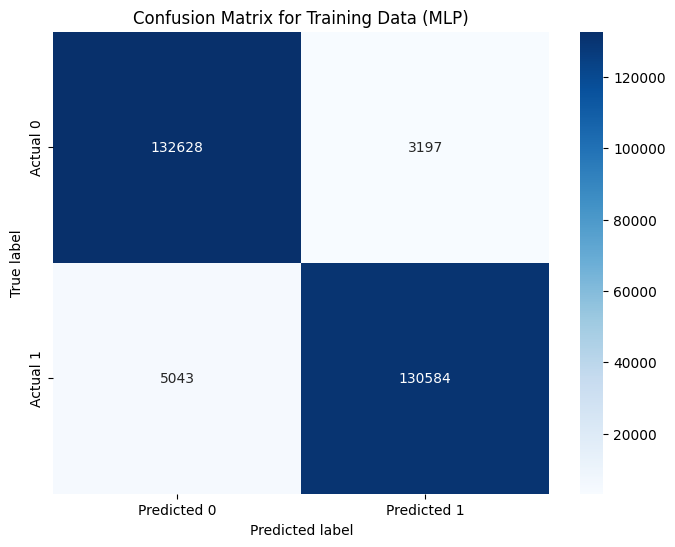

Training Data Metrics:
Accuracy: 0.9696447254026495
Precision: 0.9761027350670125
Recall: 0.9628171381804508
F1-score: 0.9694144197648177


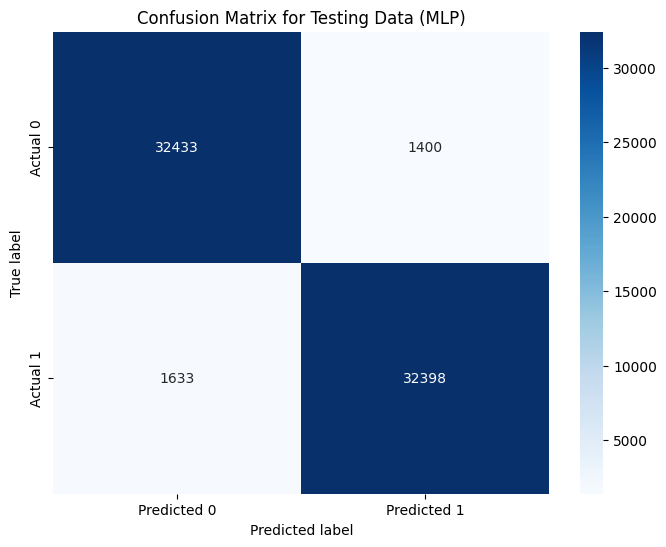

Testing Data Metrics:
Accuracy: 0.9553076741718731
Precision: 0.9585774306171962
Recall: 0.9520143398665922
F1-score: 0.9552846127762461


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions on training data
y_train_pred = mlp.predict(X_train_scaled)

# Confusion matrix for training data
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Training Data (MLP)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculate accuracy, precision, recall, and F1-score for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_score_train = f1_score(y_train, y_train_pred)

print("Training Data Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_score_train)

# Predictions on testing data
y_test_pred = mlp.predict(X_test_scaled)

# Confusion matrix for testing data
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Testing Data (MLP)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculate accuracy, precision, recall, and F1-score for testing data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_score_test = f1_score(y_test, y_test_pred)

print("Testing Data Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)


**2.Unsupervised ML Algorithm**

**Clustering**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy with Clusters: 0.952787928798774


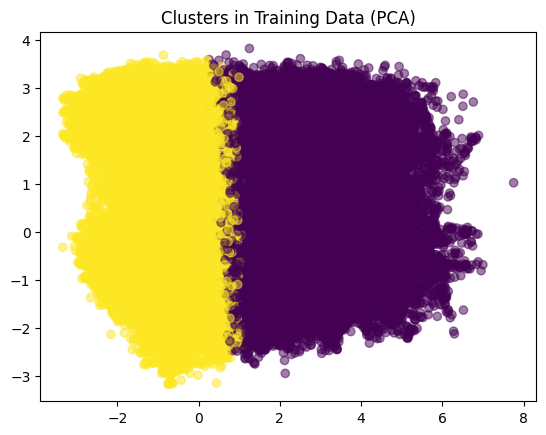

In [31]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize the K-means clusterer
kmeans = KMeans(n_clusters=2, random_state=42)  # You can change the number of clusters as needed

# Apply clustering to the training data
cluster_assignments_train = kmeans.fit_predict(X_train_scaled)

# Add cluster assignments as a new feature
X_train_with_clusters = np.column_stack((X_train_scaled, cluster_assignments_train))

# Apply the same transformation to the test data
cluster_assignments_test = kmeans.predict(X_test_scaled)
X_test_with_clusters = np.column_stack((X_test_scaled, cluster_assignments_test))

# Define and train the MLP classifier with the new features
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)
mlp.fit(X_train_with_clusters, y_train)

# Predict on the test data
y_pred = mlp.predict(X_test_with_clusters)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Clusters:", accuracy)

# Optionally, visualize the clusters with PCA to see how data clusters
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=cluster_assignments_train, cmap='viridis', alpha=0.5)
plt.title("Clusters in Training Data (PCA)")
plt.show()


Confusion Matrix


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


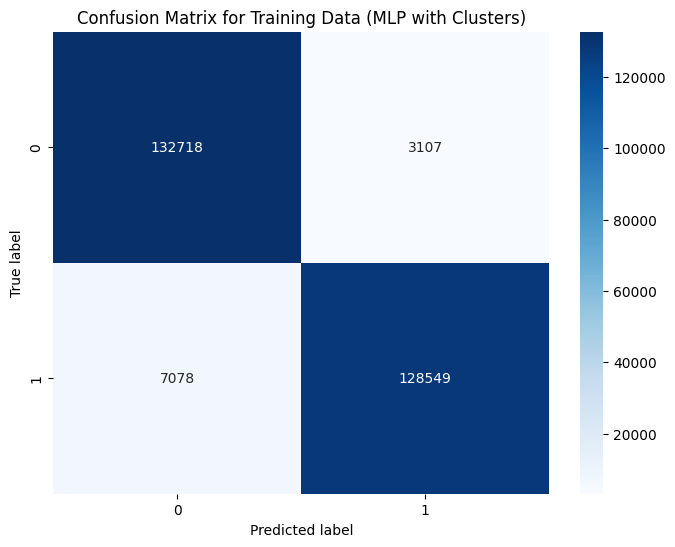

Training Data Metrics:
Accuracy: 0.9624795543963574
Precision: 0.9764006197970468
Recall: 0.9478127511483702
F1-score: 0.9618943217488579


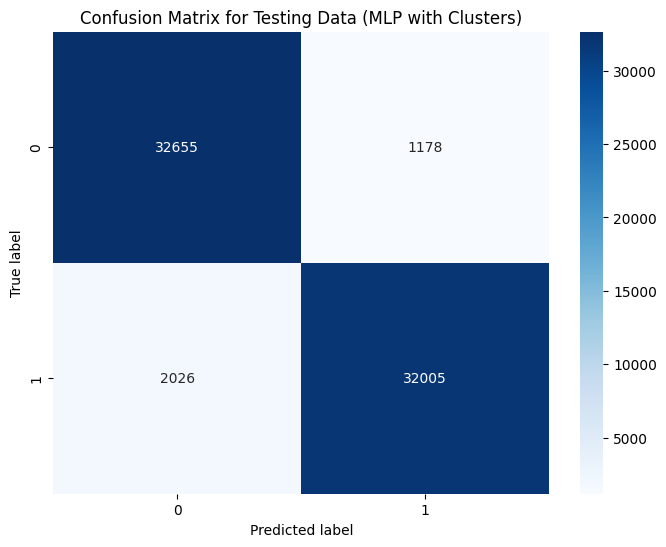

Testing Data Metrics:
Accuracy: 0.952787928798774
Precision: 0.9644998945243046
Recall: 0.9404660456642473
F1-score: 0.9523313595381915


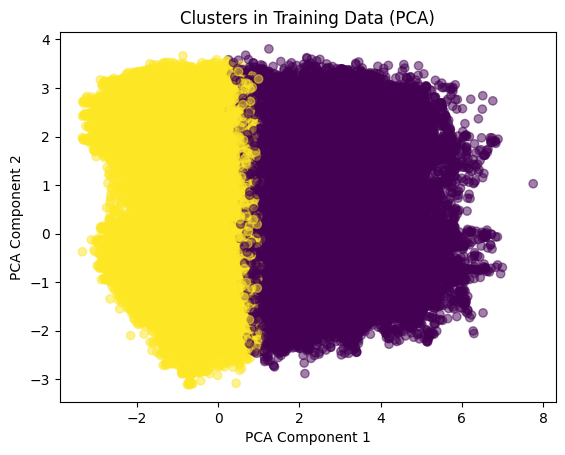

In [32]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the K-means clusterer and apply clustering to the training data
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_assignments_train = kmeans.fit_predict(X_train_scaled)

# Add cluster assignments as a new feature
X_train_with_clusters = np.column_stack((X_train_scaled, cluster_assignments_train))

# Apply the same transformation to the test data
cluster_assignments_test = kmeans.predict(X_test_scaled)
X_test_with_clusters = np.column_stack((X_test_scaled, cluster_assignments_test))

# Define and train the MLP classifier with the new features
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)
mlp.fit(X_train_with_clusters, y_train)

# Predictions on training data
y_train_pred = mlp.predict(X_train_with_clusters)

# Confusion matrix for training data
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Training Data (MLP with Clusters)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Calculate accuracy, precision, recall, and F1-score for training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_score_train = f1_score(y_train, y_train_pred)

print("Training Data Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_score_train)

# Predictions on testing data
y_test_pred = mlp.predict(X_test_with_clusters)

# Confusion matrix for testing data
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Testing Data (MLP with Clusters)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Calculate accuracy, precision, recall, and F1-score for testing data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_score_test = f1_score(y_test, y_test_pred)

print("Testing Data Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_score_test)

# Visualize the clusters with PCA for the training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=cluster_assignments_train, cmap='viridis', alpha=0.5)
plt.title("Clusters in Training Data (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


**Testing the model for any given input**

In [33]:
import numpy as np

# Assuming you have the input data stored in 'input_data'
input_data = [0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,25.84,1,0,0,0,1,0,0,0,0,0,0]
# input_data = [0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,27.29,1,0,1,1,0,0,0,6,0,1,0]


# index 0 to 7 -> age category
# index 8 to 13 -> race
# index 14 to 18 -> General Health
# index 19 -> BMI , index 20 -> Smoking , index 21 -> AlchoholDrinking , index 22 -> Stroke
# index 23 -> DiffWalking , index 24->Sex, index 25 -> Diabetic ,index 26->PhysicalActivity
# index 27 -> SleepTime ,index 28->Asthma ,index 29 -> KidneyDisease, index 30->SkinCancer


# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the input data to match the shape expected by the model
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make predictions on the input data
output_prediction = rf_classifier.predict(input_data_reshaped)

# Check if the prediction is 0 or not
if output_prediction == 0:
    print("The person doesn't have a possibility of a heart attack.")
else:
    print("The person has a possibility of a heart attack.")


The person doesn't have a possibility of a heart attack.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [34]:
import numpy as np

# Assuming you have the input data stored in 'input_data'
# input_data = [0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,25.84,1,0,0,0,1,0,0,0,0,0,0]
input_data = [0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,27.29,1,0,1,1,0,0,0,6,0,1,0]


# index 0 to 7 -> age category
# index 8 to 13 -> race
# index 14 to 18 -> General Health
# index 19 -> BMI , index 20 -> Smoking , index 21 -> AlchoholDrinking , index 22 -> Stroke
# index 23 -> DiffWalking , index 24->Sex, index 25 -> Diabetic ,index 26->PhysicalActivity
# index 27 -> SleepTime ,index 28->Asthma ,index 29 -> KidneyDisease, index 30->SkinCancer


# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the input data to match the shape expected by the model
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make predictions on the input data
output_prediction = rf_classifier.predict(input_data_reshaped)

# Check if the prediction is 0 or not
if output_prediction == 'No':
    print("The person doesn't have a possibility of a heart attack.")
    print("However, to avoid future risks of heart disease, consider the following:")
    if input_data[26] == 0:
        print("- Start incorporating regular physical activity into your routine, such as walking, jogging, or cycling.")
    if input_data[19] >= 25:
        print("- Aim to achieve and maintain a healthy weight. Consult with a healthcare professional for guidance.")
    if input_data[20] == 1:
        print("- Quit smoking to reduce your risk of heart disease and other health complications.")
    if input_data[21] == 1:
        print("- Limit alcohol consumption to moderate levels to promote heart health.")
    if input_data[25] == 1:
        print("- Keep blood sugar levels under control through diet, exercise, and medication as prescribed by your doctor.")
    print("- Ensure you're getting enough quality sleep each night.")
    print("- Consider consulting with a healthcare professional for personalized advice on heart disease prevention.")
else:
    print("The person has a possibility of a heart attack.")
    print("Immediate actions and precautions are advised:")
    if input_data[19] >= 30:
        print("- The BMI is too high which increases the risk of heart disease. Immediate consultation with a doctor is recommended.")
    if input_data[20] == 1:
        print("- Smoking is a major risk factor for heart disease. Quit smoking immediately.")
    if input_data[21] == 1:
        print("- Excessive alcohol consumption can lead to heart problems. Limit alcohol intake.")
    if input_data[22] == 1:
        print("- Previous stroke history increases the likelihood of a heart attack. Immediate medical attention is required.")
    if input_data[23] == 1:
        print("- Difficulty walking suggests potential cardiovascular issues. Consult a doctor for evaluation.")
    if input_data[25] == 1:
        print("- Diabetes is a significant risk factor for heart disease. Strictly manage blood sugar levels under medical supervision.")
    print("Please consult with a doctor as soon as possible to assess your heart health and receive appropriate treatment and advice.")


The person has a possibility of a heart attack.
Immediate actions and precautions are advised:
- Smoking is a major risk factor for heart disease. Quit smoking immediately.
- Previous stroke history increases the likelihood of a heart attack. Immediate medical attention is required.
- Difficulty walking suggests potential cardiovascular issues. Consult a doctor for evaluation.
Please consult with a doctor as soon as possible to assess your heart health and receive appropriate treatment and advice.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
import pickle
import pandas as pd

# Assuming you have your data stored in a file named 'data.csv'
data = pd.read_csv('heart_2020_cleaned.csv')

# Assuming 'mlp' is your trained model
filename = 'Heart_Attack_Prediction_Final_Model.sav'
pickle.dump(mlp, open(filename, 'wb'))

# Load the model
loaded_model = pickle.load(open(filename, 'rb'))

# Access columns of your data
for column in data.columns:
    print(column)


HeartDisease
BMI
Smoking
AlcoholDrinking
Stroke
PhysicalHealth
MentalHealth
DiffWalking
Sex
AgeCategory
Race
Diabetic
PhysicalActivity
GenHealth
SleepTime
Asthma
KidneyDisease
SkinCancer
